In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import *

In [2]:
raw_path=''

In [3]:
olist_customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')

In [4]:
olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')

In [5]:
olist_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')

In [6]:
olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')

In [7]:
olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')

In [8]:
olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')

In [9]:
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')

In [10]:
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

In [11]:
olist_categname = pd.read_csv(raw_path + 'product_category_name_translation.csv')

# olist_customer --------------------------------------------------------

In [7]:
olist_customer.info(verbose=True,show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   customer_id               object
 1   customer_unique_id        object
 2   customer_zip_code_prefix  int64 
 3   customer_city             object
 4   customer_state            object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
olist_customer.info(verbose=True,show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   customer_id               object
 1   customer_unique_id        object
 2   customer_zip_code_prefix  int64 
 3   customer_city             object
 4   customer_state            object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
olist_customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [10]:
olist_customer.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

## the ,'customer_unique_id':'nunique' is not giving the same 'customer_id':'nunique'

In [11]:
olist_customer.groupby('customer_state').agg({'customer_city':'nunique','customer_zip_code_prefix':'nunique','customer_unique_id':'nunique','customer_id':'nunique'}).sort_values(by='customer_city',ascending=False)

,customer_city,customer_zip_code_prefix,customer_unique_id,customer_id
customer_state,,,,
MG,745,1349,11259,11635
SP,629,5591,40302,41746
RS,379,877,5277,5466
PR,364,861,4882,5045
BA,353,735,3277,3380
SC,240,517,3534,3637
GO,178,540,1952,2020
CE,161,384,1313,1336
PE,152,439,1609,1652


In [12]:
pd.DataFrame().mode

<bound method DataFrame.mode of Empty DataFrame
Columns: []
Index: []>

# olist_geolocation --------------------------------------------------------

In [13]:
olist_geolocation.info(verbose=True,show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   geolocation_zip_code_prefix  int64  
 1   geolocation_lat              float64
 2   geolocation_lng              float64
 3   geolocation_city             object 
 4   geolocation_state            object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [14]:
olist_geolocation.info(verbose=True,show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   geolocation_zip_code_prefix  int64  
 1   geolocation_lat              float64
 2   geolocation_lng              float64
 3   geolocation_city             object 
 4   geolocation_state            object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [15]:
olist_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [16]:
olist_geolocation.nunique()

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

## the ,'geolocation_city':'nunique' is not giving the same 'customer_city':'nunique' while the state is same or its like that they are offer the servieses or the data is of point upping their span

## and the lat_log is not matching with original and geolocation_zip_code_prefix is can be used to find density of zipcode and that can be used

In [32]:
olist_geolocation['lon_lat'] = olist_geolocation.geolocation_lng.astype(str)+olist_geolocation.geolocation_lat.astype(str)

In [33]:
olist_geolocation.groupby('geolocation_state').agg({'geolocation_city':'nunique','geolocation_zip_code_prefix':'nunique','geolocation_lng':'nunique','geolocation_lat':'nunique','lon_lat':'nunique'}).sort_values(by='geolocation_city',ascending=False)

,geolocation_city,geolocation_zip_code_prefix,geolocation_lng,geolocation_lat,lon_lat
geolocation_state,,,,,
MG,1426,1868,100207,100202,100288
SP,1048,6349,273628,273479,274019
RS,691,1132,47441,47458,47533
BA,652,992,27290,27285,27321
PR,651,1046,44395,44372,44436
SC,420,620,29307,29286,29326
GO,384,773,15005,14998,15017
MA,299,313,6133,6137,6138
PI,278,307,3519,3521,3521


# olist_orders --------------------------------------------------------

In [6]:
for i,c in enumerate(olist_orders.columns):
    if i >= 3:
        olist_orders[c]=pd.to_datetime(olist_orders[c])

In [7]:
olist_orders.info(verbose=True,show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       object        
 1   customer_id                    object        
 2   order_status                   object        
 3   order_purchase_timestamp       datetime64[ns]
 4   order_approved_at              datetime64[ns]
 5   order_delivered_carrier_date   datetime64[ns]
 6   order_delivered_customer_date  datetime64[ns]
 7   order_estimated_delivery_date  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [8]:
olist_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [9]:
olist_orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [10]:
olist_orders.shape

(99441, 8)

### row count with null

In [11]:
olist_orders[ olist_orders.isnull().sum(axis=1) > 0 ].shape

(2980, 8)

### row count with non null

In [12]:
olist_orders[ olist_orders.isnull().sum(axis=1) == 0 ].shape

(96461, 8)

In [13]:
olist_orders.head(5) # faster then iloc

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [14]:
def get_quarter(hour):
    if 0 <= hour < 8:
        return 1
    elif 8 <= hour < 18:
        return 2
    else: 
        return 3

# Apply the function to the 'DateTime' column to get the quarter
olist_orders['time_of_day']=olist_orders.order_purchase_timestamp.dt.hour.apply(get_quarter)

In [15]:
olist_orders.time_of_day.value_counts()

2    58868
3    34100
1     6473
Name: time_of_day, dtype: int64

## this table is perfect join joint table

## the date type is different thing to handle

In [65]:
olist_orders.groupby('order_status').agg(customer_id_unique=('customer_id','nunique'),
                                         order_id_unique=('order_id','nunique'),
                                         time_of_day_mode=('time_of_day',lambda x: x.mode().iat[0])).sort_values(by='customer_id_unique',ascending=False)

,customer_id_unique,order_id_unique,time_of_day_mode
order_status,,,
delivered,96478,96478,2
shipped,1107,1107,2
canceled,625,625,2
unavailable,609,609,2
invoiced,314,314,2
processing,301,301,2
created,5,5,2
approved,2,2,1


In [71]:
olist_orders.groupby('order_status').agg(customer_id_unique=('customer_id','nunique'),
                                         order_id_unique=('order_id','nunique'),
                                         time_of_day_mode=('time_of_day',mode)).sort_values(by='customer_id_unique',ascending=False)

/home/kar911/.local/lib/python3.10/site-packages/pandas/core/groupby/groupby.py:1668: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)


,customer_id_unique,order_id_unique,time_of_day_mode
order_status,,,
delivered,96478,96478,"([2], [57100])"
shipped,1107,1107,"([2], [629])"
canceled,625,625,"([2], [383])"
unavailable,609,609,"([2], [375])"
invoiced,314,314,"([2], [202])"
processing,301,301,"([2], [176])"
created,5,5,"([2], [3])"
approved,2,2,"([1], [1])"


In [17]:
olist_orders['time_to_approved'] = (olist_orders.order_approved_at - olist_orders.order_purchase_timestamp) / np.timedelta64(1, 'D')

In [18]:
olist_orders.time_to_approved

0        0.007431
1        1.279745
2        0.011505
3        0.012419
4        0.042940
           ...   
99436    0.000000
99437    0.008090
99438    0.012188
99439    0.005486
99440    0.599282
Name: time_to_approved, Length: 99441, dtype: float64

In [19]:
olist_orders['reach_time'] = (olist_orders.order_delivered_customer_date - olist_orders.order_purchase_timestamp ) / np.timedelta64(1, 'D')

In [20]:
olist_orders.reach_time

0         8.436574
1        13.782037
2         9.394213
3        13.208750
4         2.873877
           ...    
99436     8.218009
99437    22.193727
99438    24.859421
99439    17.086424
99440     7.674306
Name: reach_time, Length: 99441, dtype: float64

In [21]:
olist_orders['estim_reach_time'] = (olist_orders.order_estimated_delivery_date - olist_orders.order_purchase_timestamp ) / np.timedelta64(1, 'D')

In [22]:
olist_orders.isnull().sum(axis=1).max()

5

In [23]:
diff=olist_orders.estim_reach_time-olist_orders.reach_time
diff[ olist_orders.isnull().sum(axis=1) ].describe()

count    99441.000000
mean         7.323824
std          1.327180
min          5.355729
25%          7.107488
50%          7.107488
75%          7.107488
max         17.245498
dtype: float64

## day cycle to watch

In [24]:
olist_orders.order_purchase_timestamp.dt.hour.value_counts(normalize=True)

16    0.067125
11    0.066150
14    0.066059
13    0.065546
15    0.064903
21    0.062519
20    0.062278
10    0.062117
17    0.061846
12    0.060287
19    0.060156
22    0.058487
18    0.058014
9     0.048119
23    0.041462
8     0.029837
0     0.024075
7     0.012379
1     0.011766
2     0.005129
6     0.005048
3     0.002735
4     0.002072
5     0.001891
Name: order_purchase_timestamp, dtype: float64

In [25]:
x1=olist_orders.order_purchase_timestamp.dt.hour.value_counts(normalize=True).sort_index()

<AxesSubplot: ylabel='order_purchase_timestamp'>

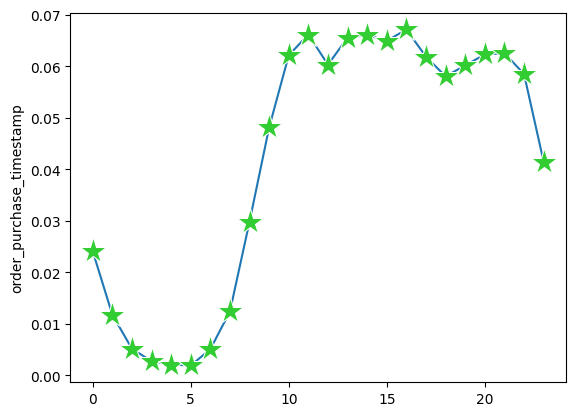

In [26]:
sn.lineplot(y=x1,x=range(len(x1)),marker='*', markerfacecolor='limegreen', markersize=20)

In [27]:
## to count the recorde's  existense

In [28]:
olist_orders.order_purchase_timestamp[(olist_orders.order_purchase_timestamp.dt.year == 2018 ) & (olist_orders.order_purchase_timestamp.dt.month > 8 )]

1801    2018-09-20 13:54:16
5149    2018-09-13 09:56:12
9976    2018-09-11 16:45:54
16366   2018-09-17 17:21:16
20778   2018-09-06 14:50:07
24410   2018-09-03 18:40:50
31170   2018-09-10 17:51:25
31891   2018-10-03 18:55:29
33979   2018-09-25 11:59:18
37003   2018-09-26 08:40:15
39919   2018-09-03 14:14:25
50387   2018-09-29 09:13:03
53501   2018-09-06 10:48:12
60938   2018-10-17 17:30:18
62360   2018-09-03 09:06:57
68373   2018-10-16 20:16:02
73341   2018-09-03 18:45:34
80019   2018-09-12 15:32:16
88500   2018-10-01 15:30:09
99347   2018-09-06 18:45:47
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [29]:
f=pd.crosstab(olist_orders.order_purchase_timestamp.dt.month,olist_orders.order_purchase_timestamp.dt.year)

<AxesSubplot: xlabel='order_purchase_timestamp'>

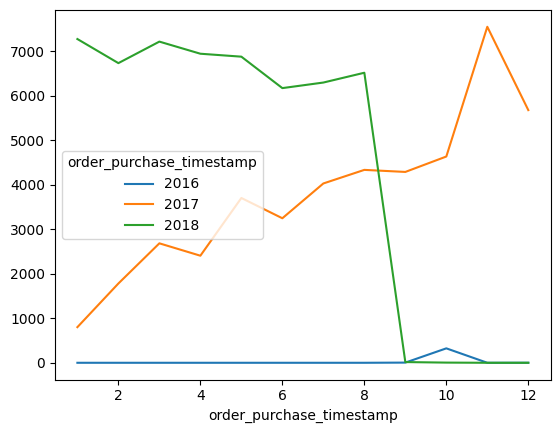

In [30]:
f.plot()

In [31]:
olist_orders.order_purchase_timestamp.dt.year.value_counts()

2018    54011
2017    45101
2016      329
Name: order_purchase_timestamp, dtype: int64

## mon = 0 , sun =6

In [89]:
ff=olist_orders.order_purchase_timestamp.dt.dayofweek+1

<AxesSubplot: ylabel='order_purchase_timestamp'>

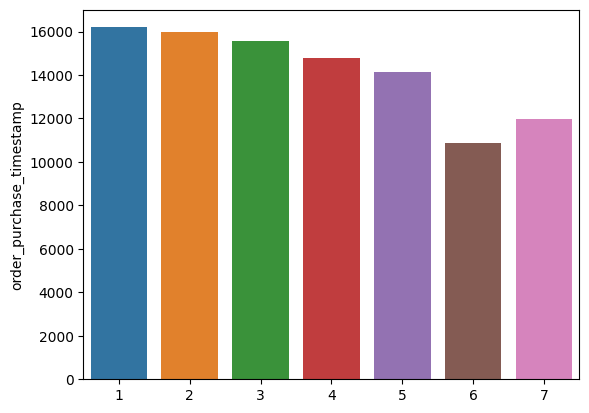

In [90]:
sn.barplot(y=ff.value_counts(),x=ff.value_counts().index)

In [35]:
pd.to_datetime(olist_orders.order_purchase_timestamp).dt.tz

## Apply the function to the 'DateTime' column to get the quarter # good division 

In [36]:
def get_quarter(hour):
    if 0 <= hour < 8:
        return 1
    elif 8 <= hour < 18:
        return 2
    else: 
        return 3

# Apply the function to the 'DateTime' column to get the quarter
dd=pd.to_datetime(olist_orders.order_purchase_timestamp).dt.hour.apply(get_quarter).value_counts()

In [37]:
dd

2    58868
3    34100
1     6473
Name: order_purchase_timestamp, dtype: int64

In [45]:
from scipy.stats import chi2_contingency,chi2,chisquare

In [47]:
# dd.values
chi2_stat, p_value=chisquare(dd.values)
chi2_stat, p_value

(41451.12154946149, 0.0)

# Extra

In [ ]:
df['diff_weeks'] = (df['end_date'] - df['start_date']) / np.timedelta64(1, 'W')

In [ ]:
df['diff_months'] = (df['end_date'] - df['start_date']) / np.timedelta64(1, 'M')

In [ ]:
df['diff_years'] = (df['end_date'] - df['start_date']) / np.timedelta64(1, 'Y')

In [47]:
def get_quarter(hour):
    if 6 <= hour < 12:
        return 2
    elif 12 <= hour < 18:
        return 3
    elif 18 <= hour < 23:
        return 4
    else: 
        return 1

# Apply the function to the 'DateTime' column to get the quarter
dd1=pd.to_datetime(olist_orders.order_purchase_timestamp).dt.hour.apply(get_quarter).value_counts()

In [46]:
chi2_stat, p_value=chisquare(dd)
chi2_stat, p_value

(41451.12154946149, 0.0)

In [48]:
chi2_stat, p_value=chisquare(dd1)
chi2_stat, p_value

(18955.123088062268, 0.0)

In [45]:
from scipy.stats import chi2_contingency,chi2,chisquare

# Sample data: observed frequencies in different categories
observed_frequencies = np.array([30, 20, 15, 35])

# Expected frequencies (you can provide your expected values or use a theoretical distribution)
expected_frequencies = np.array([25, 25, 25, 25])

# Perform chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency([observed_frequencies])


In [ ]:
olist_geolocation.lon_lat[0]

'-23.54562128115268-46.63929204800168'

In [ ]:
import pandas as pd

# Sample DataFrame with longitude and latitude columns
data = {'Longitude': [12.34, 56.78, 90.12],
        'Latitude': [34.56, 78.90, 12.34]}
df = pd.DataFrame(data)

# Create a new column 'LocationID' by concatenating Longitude and Latitude
df['LocationID'] = df['Longitude'].astype(str) + '_' + df['Latitude'].astype(str)

# Display the DataFrame with the new 'LocationID' column
print(df)

   Longitude  Latitude   LocationID
0      12.34     34.56  12.34_34.56
1      56.78     78.90   56.78_78.9
2      90.12     12.34  90.12_12.34


# next

# olist_order_items ----------------------------------------------------

In [39]:
for i,c in enumerate(olist_order_items.columns):
    if i == 4:
        olist_order_items[c]=pd.to_datetime(olist_order_items[c])

In [40]:
olist_order_items.info(verbose=True,show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Dtype         
---  ------               -----         
 0   order_id             object        
 1   order_item_id        int64         
 2   product_id           object        
 3   seller_id            object        
 4   shipping_limit_date  datetime64[ns]
 5   price                float64       
 6   freight_value        float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [41]:
olist_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [42]:
olist_order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [43]:
olist_order_items.shape

(112650, 7)

In [44]:
olist_order_items.head(10) # faster then iloc

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40
